In [ ]:
# Se conecta al Drive:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Imports para el cv:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Imports para transformación de estructura de datos
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Imports para Balance de datos:
from collections import Counter

# Imports para creación del Modelo:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from keras import utils as np_utils

# Imports para la transformación de Labels:
from sklearn.preprocessing import OneHotEncoder
from keras.models import load_model
import matplotlib.pyplot as plt

%cd "/content/drive/Shareddrives/Redes neuronales/TP1"
!pip install import-ipynb
import import_ipynb
from Helper import *

# Metrics:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

/content/drive/Shareddrives/Redes neuronales/TP1


## Carga de Datos:

In [ ]:
# Carga de datos:
df_train = pd.read_hdf("/content/drive/Shareddrives/Redes neuronales/TP1/data/train_data.hdf5")
df_valid = pd.read_hdf("/content/drive/Shareddrives/Redes neuronales/TP1/data/valid_data.hdf5")
df_test = pd.read_hdf("/content/drive/Shareddrives/Redes neuronales/TP1/data/test_data.hdf5")

In [ ]:
# Pre procesados
text_train_valid_filtrado_stem = open_txt('train_valid_filtrado_stem', "/content/drive/Shareddrives/Redes neuronales/TP1/data_results/")
text_train_valid_filtrado_lc_stem = open_txt('train_valid_filtrado_lc_stem', "/content/drive/Shareddrives/Redes neuronales/TP1/data_results/")

In [ ]:
text_train_filtered_STEM = text_train_valid_filtrado_stem[0:549367] #549367
text_valid_filtered_STEM = text_train_valid_filtrado_stem[549367:] #9842
text_train_filtered_LC_STEM = text_train_valid_filtrado_lc_stem[0:549367] #549367
text_valid_filtered_LC_STEM = text_train_valid_filtrado_lc_stem[549367:] #9842

In [ ]:
# Se dividen y arman las variables como vamos a trabajar:
labels_train = df_train["gold_label"].tolist()
labels_valid = df_valid["gold_label"].tolist()

## Se corrobora el balance de los datos:

In [ ]:
# Balance para Train:
Counter(labels_train) 

Counter({'contradiction': 183187, 'entailment': 183416, 'neutral': 182764})

In [ ]:
# Balance para Valid:
Counter(labels_valid)

Counter({'contradiction': 3278, 'entailment': 3329, 'neutral': 3235})

## Se crea y entrena el modelo:

En el archivo de excel "Pruebas MLP", se muestra en resumen los diferentes modelos con los que se fue probando. Los parametros que se muestran a continuación son los que mejor entrenaron y predijeron, siendo la metrica principal el accuracy.

El pre-pocesamiento de los textos fueron hechos con el Multinomial Bayes, y acá se utilizarón esos archivos generados.

### Parametros para la creación del modelo:

In [ ]:
# Parametros de entrada:
cantidad_capas = 3
min_df=0.0000001
max_df=0.8
ngram_range = (1,1)
cantidad_neuronas = [100, 100, 3]
activation_function = ["relu","LeakyReLU", "softmax"]
alpha = [0.0, 0.8]
learning_rate = 0.1

### Parametros para el entrenamiento del modelo:

In [ ]:
# Parametros de entrada:
batch_size = 1000
epochs = 20
batch_val = len(text_valid_filtered_LC_STEM)

### Modelo y accuracy para texto pre-procesado solo son Stem:

In [ ]:
# Creación modelo:
model_1 = crear_MLP_model(text_train_filtered_STEM, text_valid_filtered_STEM, cant_capas= cantidad_capas, min_df_= min_df, max_df_= max_df, ngram_range_= ngram_range, cant_neuronas= cantidad_neuronas, activation_func= activation_function, learning_rate= learning_rate, alpha = alpha)
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               1991700   
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 303       
Total params: 2,002,103
Trainable params: 2,002,103
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Lo entreno:
model_1_entrenado = entrenar_MLP_model(model_1, text_train_filtered_STEM, labels_train, text_valid_filtered_STEM, labels_valid, batch_size= batch_size, batch_val=batch_val, min_df_= min_df, max_df_= max_df, ngram_range_= ngram_range, epochs= epochs)

(549367, 19916)
(9842, 19916)
training model....
Epoch 1/20
549/549 [==============================] - 139s 251ms/step - loss: 0.9956 - accuracy: 0.5150 - val_loss: 0.9144 - val_accuracy: 0.5774
Epoch 2/20
549/549 [==============================] - 135s 245ms/step - loss: 0.8946 - accuracy: 0.5913 - val_loss: 0.8615 - val_accuracy: 0.6106
Epoch 3/20
549/549 [==============================] - 135s 246ms/step - loss: 0.8651 - accuracy: 0.6079 - val_loss: 0.8446 - val_accuracy: 0.6150
Epoch 4/20
549/549 [==============================] - 144s 262ms/step - loss: 0.8506 - accuracy: 0.6154 - val_loss: 0.8242 - val_accuracy: 0.6344
Epoch 5/20
549/549 [==============================] - 142s 258ms/step - loss: 0.8388 - accuracy: 0.6225 - val_loss: 0.8601 - val_accuracy: 0.6061
Epoch 6/20
549/549 [==============================] - 141s 257ms/step - loss: 0.8283 - accuracy: 0.6293 - val_loss: 0.8446 - val_accuracy: 0.6123
Epoch 7/20
549/549 [==============================] - 143s 260ms/step - los

Se guarda el modelo entrenado:

In [ ]:
# Guardar el Modelo
model_1_entrenado.save('/content/drive/Shareddrives/Redes neuronales/TP1/Modelos_entrenados/modelo_entrenado_STEM.h5')

### Modelo y accuracy para texto pre-procesado lc_Stem:

In [ ]:
# Creación modelo:
model_2 = crear_MLP_model(text_train_filtered_LC_STEM, text_valid_filtered_LC_STEM, cant_capas= cantidad_capas, min_df_= min_df, max_df_= max_df, ngram_range_= ngram_range, cant_neuronas= cantidad_neuronas, activation_func= activation_function, learning_rate= learning_rate, alpha = alpha)
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               1991700   
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 303       
Total params: 2,002,103
Trainable params: 2,002,103
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Lo entreno:
model_2_entrenado = entrenar_MLP_model(model_2, text_train_filtered_LC_STEM, labels_train, text_valid_filtered_LC_STEM, labels_valid, batch_size= batch_size, batch_val=batch_val, min_df_= min_df, max_df_= max_df, ngram_range_= ngram_range, epochs= epochs)

(549367, 19916)
(9842, 19916)
training model....
Epoch 1/20
549/549 [==============================] - 147s 268ms/step - loss: 0.9932 - accuracy: 0.5166 - val_loss: 0.9136 - val_accuracy: 0.5810
Epoch 2/20
549/549 [==============================] - 150s 272ms/step - loss: 0.8953 - accuracy: 0.5903 - val_loss: 0.8730 - val_accuracy: 0.5963
Epoch 3/20
549/549 [==============================] - 146s 265ms/step - loss: 0.8672 - accuracy: 0.6062 - val_loss: 0.8429 - val_accuracy: 0.6180
Epoch 4/20
549/549 [==============================] - 145s 264ms/step - loss: 0.8502 - accuracy: 0.6156 - val_loss: 0.8284 - val_accuracy: 0.6328
Epoch 5/20
549/549 [==============================] - 146s 266ms/step - loss: 0.8416 - accuracy: 0.6208 - val_loss: 0.8196 - val_accuracy: 0.6354
Epoch 6/20
549/549 [==============================] - 154s 280ms/step - loss: 0.8298 - accuracy: 0.6279 - val_loss: 0.8163 - val_accuracy: 0.6359
Epoch 7/20
549/549 [==============================] - 148s 270ms/step - los

Se decidio utilizar el Hold-out, y no el cross-validation, ya que de por si el modelo es mucho más complejo que el de MultinomialBayes.

Además, el método Hold-out es bueno para usar cuando se tiene un conjunto de datos muy grande, ya que, a diferencia de la validación, no necesita tanto poder computacional y tiempo para ejecutarse.

## Se guardan el modelo y las metricas

Cuando se quiera realizar el guardado de los modelos, recordar cambiar el path del mismo.

In [ ]:
#Se guardan los modelos:
model_1_entrenado.save('/content/drive/Shareddrives/Redes neuronales/TP1/Modelos_entrenados/modelo_entrenado_STEM.h5')
model_2_entrenado.save('/content/drive/Shareddrives/Redes neuronales/TP1/Modelos_entrenados/modelo_entrenado_LC_STEM.h5')

In [ ]:
# Se guardan las metricas:

# Modelo 1:
dict = {'train_loss': model_1_entrenado.history.history['loss'], 'train_accuracy': model_1_entrenado.history.history['accuracy'],
        'valid_loss': model_1_entrenado.history.history['val_loss'], 'valid_accuracy': model_1_entrenado.history.history['val_accuracy']}     
df_1 = pd.DataFrame(dict)
df_1.to_csv('/content/drive/Shareddrives/Redes neuronales/TP1/Modelos_entrenados/metrics_STEM.csv')

# Modelo 2:
dict = {'train_loss': model_2_entrenado.history.history['loss'], 'train_accuracy': model_2_entrenado.history.history['accuracy'],
        'valid_loss': model_2_entrenado.history.history['val_loss'], 'valid_accuracy': model_2_entrenado.history.history['val_accuracy']}     
df_1 = pd.DataFrame(dict)
df_1.to_csv('/content/drive/Shareddrives/Redes neuronales/TP1/Modelos_entrenados/metrics_STEM.csv')

## Se cargan el modelo y las metricas:

In [ ]:
model_STEM = load_model('/content/drive/Shareddrives/Redes neuronales/TP1/Modelos_entrenados/modelo_entrenado_STEM.h5')
metrics_STEM = pd.read_csv('/content/drive/Shareddrives/Redes neuronales/TP1/Modelos_entrenados/metrics_STEM.csv')
model_LC_STEM = load_model('/content/drive/Shareddrives/Redes neuronales/TP1/Modelos_entrenados/modelo_entrenado_LC_STEM.h5')
metrics_LC_STEM = pd.read_csv('/content/drive/Shareddrives/Redes neuronales/TP1/Modelos_entrenados/metrics_LC_STEM.csv')

## Se hace la clasificación para el conjunto de testeo

### Evaluación de los modelos

Primero se va a evaluar con cual de los dos modelos vamos a predecir.

##### Modelo de Stemming:

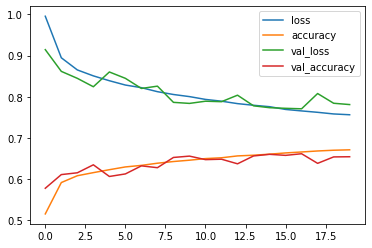

In [ ]:
# Se plotean las metricas para el modelo 1:
plt.plot(metrics_STEM['Unnamed: 0'].to_numpy(), metrics_STEM['train_loss'].to_numpy(), label = 'loss')
plt.plot(metrics_STEM['Unnamed: 0'].to_numpy(), metrics_STEM['train_accuracy'].to_numpy(), label = 'accuracy')
plt.plot(metrics_STEM['Unnamed: 0'].to_numpy(), metrics_STEM['valid_loss'].to_numpy(), label = 'val_loss')
plt.plot(metrics_STEM['Unnamed: 0'].to_numpy(), metrics_STEM['valid_accuracy'].to_numpy(), label = 'val_accuracy')
plt.legend()
plt.show()

##### Modelo de LowCase:

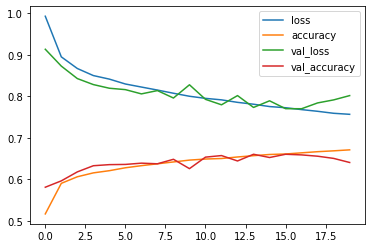

In [ ]:
# Se plotean las metricas para el modelo 1:
plt.plot(metrics_LC_STEM['Unnamed: 0'].to_numpy(), metrics_LC_STEM['train_loss'].to_numpy(), label = 'loss')
plt.plot(metrics_LC_STEM['Unnamed: 0'].to_numpy(), metrics_LC_STEM['train_accuracy'].to_numpy(), label = 'accuracy')
plt.plot(metrics_LC_STEM['Unnamed: 0'].to_numpy(), metrics_LC_STEM['valid_loss'].to_numpy(), label = 'val_loss')
plt.plot(metrics_LC_STEM['Unnamed: 0'].to_numpy(), metrics_LC_STEM['valid_accuracy'].to_numpy(), label = 'val_accuracy')
plt.legend()
plt.show()

Como se puede ver,los valores de accuracy obtenidos para el modelo 2 (entrenado con el texto pre-procesado por LC_STEM), son levemente superiores que para el modelo 1 (entrenado con el texto pre-procesado por STEM). además, en el caso del val_accuracy del modelo entrenado con LC_STEM se puede percibir una menor cantidad de ruido que para el modelo del STEM. 

Es por esto que se elige realizar las predicciones correspondientes con el texto pre-procesado por LowCase (LC) y Stemming (STEM). 

### Clasificación del conjunto de testeo

In [ ]:
# Se carga el archivo
text_test_filtrado = open_txt('test_filtrado_stem', "/content/drive/Shareddrives/Redes neuronales/TP1/data_results/")
# Se crea el count vector del mismo
cv_test = count_vector_test(text_train_filtered_LC_STEM, text_test_filtrado, min_df_= min_df, max_df_= max_df)

Se hace la clasificacion

In [ ]:
test_labels = model_LC_STEM.predict(cv_test)
classes=np.argmax(test_labels,axis=1)
print(classes)

[0 2 0 ... 0 0 0]


In [ ]:
posibles_clases = labels_train[:3]
test_predicho = convert_pd(classes, posibles_clases)
print(test_predicho)

          pred_labels
pairID               
0       contradiction
1             neutral
2       contradiction
3       contradiction
4             neutral
...               ...
9819    contradiction
9820       entailment
9821    contradiction
9822    contradiction
9823    contradiction

[9824 rows x 1 columns]


## Se hace la evalución de las segundas metricas:

Se convierten los true labels del valid de string a numeros

In [ ]:
true_valid_labels = transform_string_num(labels_valid)

Para evaluar las metricas se realiza el mismo procedimiento que para el test, para obtener sus clases predichas.

In [ ]:
cv_valid = count_vector_test(text_train_filtered_LC_STEM, text_valid_filtered_LC_STEM, min_df_= min_df, max_df_= max_df)
cv_valid_labels = model_LC_STEM.predict(cv_valid)
predict_valid_labels=np.argmax(cv_valid_labels,axis=1)
print(predict_valid_labels)

[0 1 2 ... 2 2 1]


In [ ]:
posibles_clases = labels_train[:3]
print(posibles_clases)

['contradiction', 'entailment', 'neutral']


La explicación de cada la metrica esta en el script del metodo NMBM

##### Se evalua la Precision

In [ ]:
valid_precision_score = precision_score(true_valid_labels,predict_valid_labels, average='macro')
print(valid_precision_score)

0.659674316717827


##### Se evalua el Recall

In [ ]:
valid_recall_score = recall_score(true_valid_labels,predict_valid_labels, average='macro')
print(valid_recall_score)

0.6409472020519992


##### Se evalua el F1_score

In [ ]:
valid_F1_score = f1_score(true_valid_labels,predict_valid_labels, average='macro')
print(valid_F1_score)

0.6384508722484187


Se evalua el ROC_AUC

In [ ]:
valid_roc_auc_score = roc_auc_score(true_valid_labels,cv_valid_labels, average='macro', multi_class='ovr')
print(valid_roc_auc_score)

0.8365157787344205


En este caso se eligio un paramatero multi_class='ovr', ya que se considerá que este estaría dando el resultado más general posible. Ya que la clasificación binaria esta dada por la clase que se quiere evaluar contra una "clase" donde están el resto de las las clases.

La conclusión se encuentra en el archivo del Multinomial Bayes.